In [1]:
"""Import libraries.
"""
import numpy as np
from matplotlib import pyplot as plt
from sklearn_plugins.cluster import SphericalKMeans

In [2]:
"""Make synthetic data.
"""
npoints = 200
rA = 5 + np.random.normal(size=npoints, scale=1)
rB = 7 + np.random.normal(size=npoints, scale=2)
rC = 5 + np.random.normal(size=npoints, scale=1)
phiA = np.pi / 4.0 + np.random.normal(size=npoints, scale=np.pi / 8.0)
phiB = -np.pi / 4.0 + np.random.normal(size=npoints, scale=np.pi / 32.0)
phiC = 5 / 4.0 * np.pi + np.random.normal(size=npoints, scale=np.pi / 8.0)
pointsA = np.transpose(np.array([rA * np.cos(phiA), rA * np.sin(phiA)]))
pointsB = np.transpose(np.array([rB * np.cos(phiB), rA * np.sin(phiB)]))
pointsC = np.transpose(np.array([rC * np.cos(phiC), rA * np.sin(phiC)]))
print(pointsA.shape)
print(pointsB.shape)
print(pointsC.shape)

(200, 2)
(200, 2)
(200, 2)


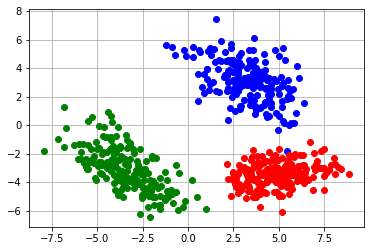

In [3]:
"""Plot data points in Cartesian space.
"""
plt.plot(pointsA[:, 0], pointsA[:, 1], 'bo')
plt.plot(pointsB[:, 0], pointsB[:, 1], 'ro')
plt.plot(pointsC[:, 0], pointsC[:, 1], 'go')
plt.grid()
plt.show()
plt.close()

In [4]:
"""Combine different categories into one dataset.
"""
X = np.vstack((pointsA, pointsB, pointsC))
print(X.shape)

(600, 2)


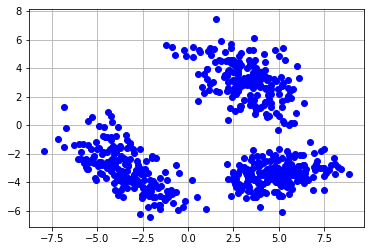

In [5]:
"""Plot combined dataset in Cartesian space.
"""
plt.plot(X[:, 0], X[:, 1], "bo")
plt.grid()
plt.show()
plt.close()

In [6]:
"""Perfom Spherical K-Means
"""
skm = SphericalKMeans(n_clusters=3, n_components=0.80)
assignment = skm.fit_predict(X)
a_index = np.argwhere(assignment == 0).squeeze()
b_index = np.argwhere(assignment == 1).squeeze()
c_index = np.argwhere(assignment == 2).squeeze()

In [7]:
"""Access centroids.
"""
centroids = skm.centroids_
print(centroids.shape)

(2, 3)


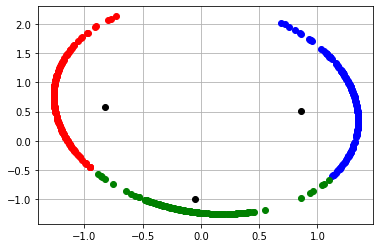

In [8]:
"""Plot clustered dataset in feature space.
"""
input_processed = skm.preprocess_input(X)
plt.plot(input_processed[a_index, 0], input_processed[a_index, 1], "bo")
plt.plot(input_processed[b_index, 0], input_processed[b_index, 1], "ro")
plt.plot(input_processed[c_index, 0], input_processed[c_index, 1], "go")
plt.plot(centroids[0], centroids[1], "ko")
plt.grid()
plt.show()
plt.close()

In [9]:
"""Test get_params set_params.
"""
print(skm.get_params())
d = skm.get_params(deep=True)
skm.set_params(**d)

{'copy': True, 'max_iter': 100, 'n_clusters': 3, 'n_components': 0.8, 'n_init': 10, 'n_processes': None, 'normalize': True, 'random_state': None, 'standarize': True, 'tol': 0.01, 'whiten': True}


SphericalKMeans(n_clusters=3)